In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nir-dataset-new/Data Collection for NIR glucometer - Sheet1.csv


In [2]:
# import the needed libraries
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

In [3]:
# Load the data
nirs_data = pd.read_csv("/kaggle/input/nir-dataset-new/Data Collection for NIR glucometer - Sheet1.csv")
nirs_data.head()

,Name,Voltage by NIR Glucometer,Reading by Dr Trust Glucometer
0,Aditya Pradhan,0.81,86
1,Anjali Jena,1.01,89
2,Krishna Singh,3.24,134
3,Nabakrushna Singh,3.61,143
4,Pratima Singh,2.87,119


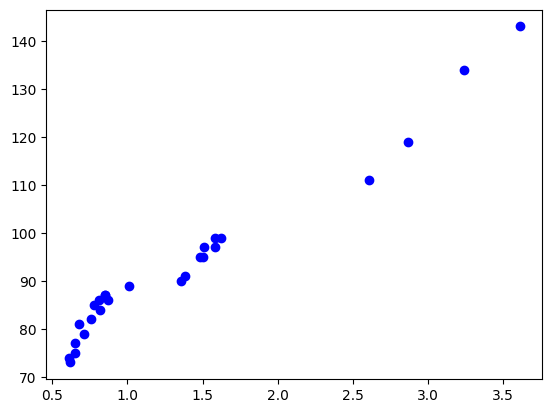

In [4]:
# select the variables X,y
X = nirs_data["Voltage by NIR Glucometer"]
y = nirs_data["Reading by Dr Trust Glucometer"]
# plot the scatter of data set
plt.scatter(X,y,c="blue")
plt.show()

In [5]:
# reshaping to a 2-D vector
Xv = X.to_numpy().reshape(-1, 1)
yv = y.to_numpy().reshape(-1, 1)

# splitting into train & test data sets 
X_train, X_test, y_train, y_test = train_test_split(Xv, yv, test_size = 0.25, random_state = 1) 

lr_model = LinearRegression() 

# training the model
lr_model.fit(X_train, y_train) 

score = lr_model.score(X_test, y_test)
print(f"score: {score}")

weight = lr_model.coef_
bias = lr_model.intercept_
print("Weight: ",weight,"\nbias: ",bias)

score: 0.9635885373367034
Weight:  [[18.89280977]] 
bias:  [67.49456981]


In [6]:
# predicting new values
y_pre = lr_model.predict(Xv)

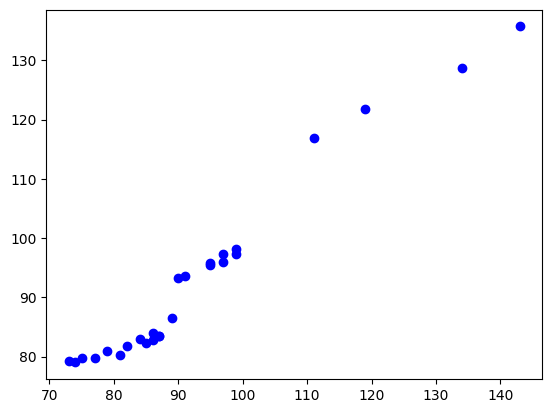

In [7]:
# plot real vs predictions
plt.scatter(y,y_pre, c="blue")
plt.show()